In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mlt
import seaborn as sns

In [ ]:
from google.colab import files
data = files.upload()

Saving poc1insurance dataset.csv to poc1insurance dataset.csv


In [ ]:
df = pd.read_csv('poc1insurance dataset.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


EDA
exploring data anailysis

In [ ]:
df.shape


(1338, 7)

In [ ]:
df.tail(3)

,age,sex,bmi,children,smoker,region,charges
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [ ]:
df.head(9)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070


In [ ]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [ ]:
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [ ]:
df['children'].unique()

array([0, 1, 3, 2, 5, 4])

In [ ]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [ ]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<ipython-input-12-911575342811>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_df = df[['age'	,'sex',	'bmi',	'children',	'smoker',	'region',	'charges']].corr()


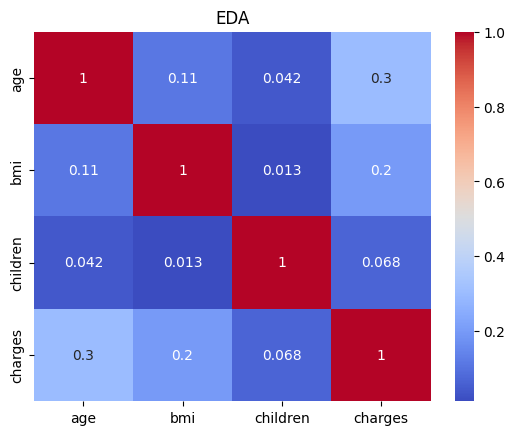

In [ ]:
corr_df = df[['age'	,'sex',	'bmi',	'children',	'smoker',	'region',	'charges']].corr()
sns.heatmap(corr_df,annot=True,cmap='coolwarm')
mlt.title('EDA')
mlt.show()

In [ ]:
s_d = df.describe()
s_d

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


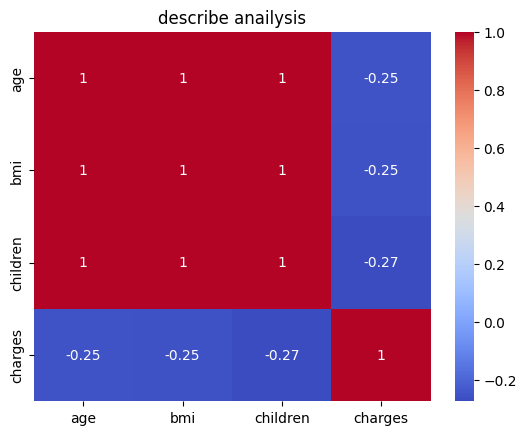

In [ ]:
des = s_d.corr()
sns.heatmap(des,annot=True,cmap='coolwarm')
mlt.title('describe anailysis')
mlt.show()

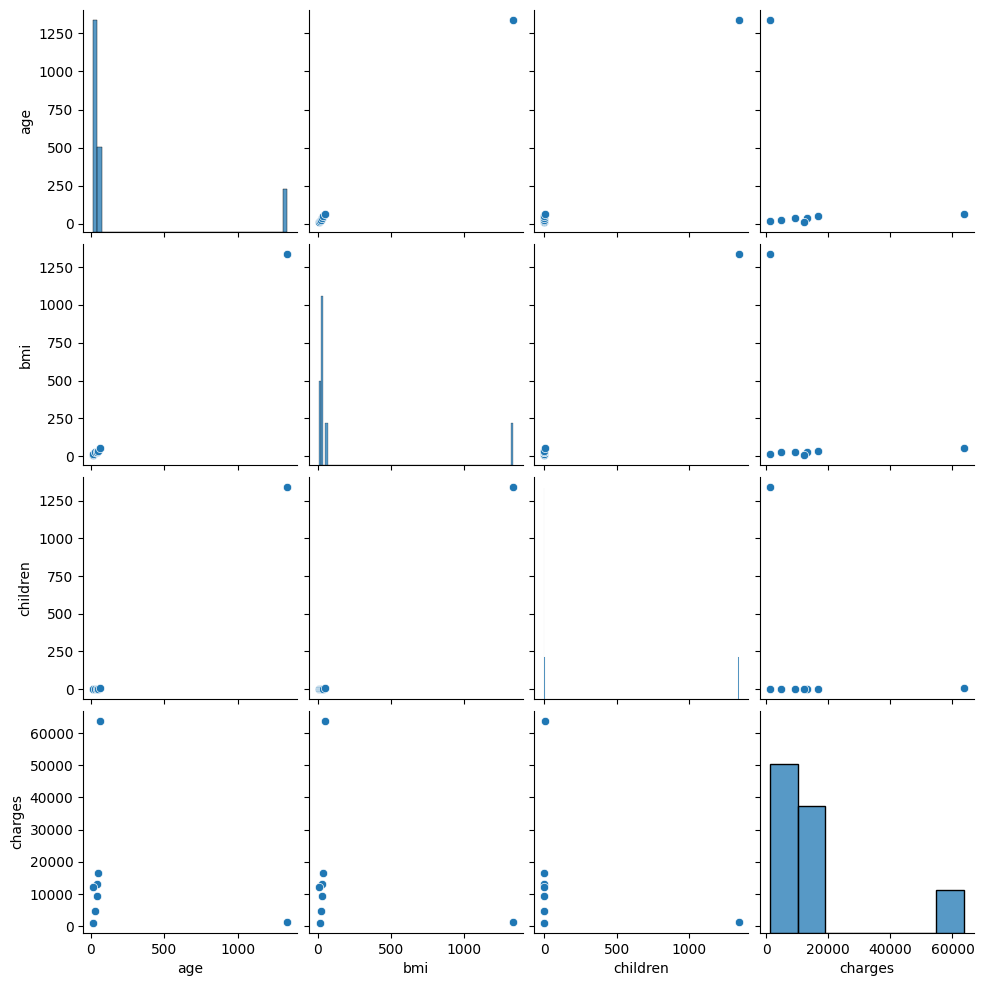

In [ ]:
sns.pairplot(s_d)

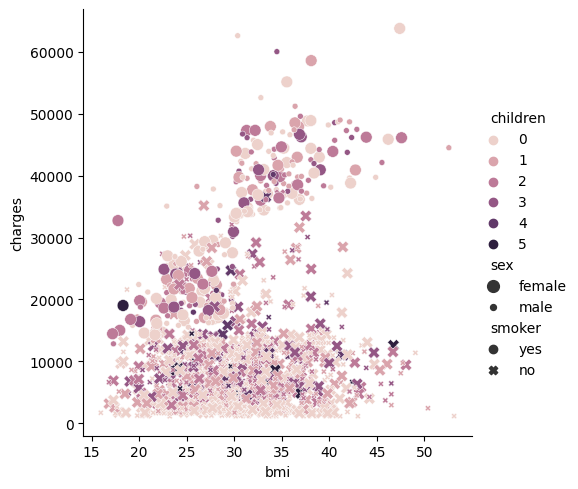

In [ ]:
sns.relplot(x = 'bmi',y = 'charges',data = df, hue = 'children',style= 'smoker',size = 'sex',color='green')

no nan value in this data set

In [ ]:
x = df.drop(['charges'],axis= 1)
Y = df.iloc[:,[6]]
x

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest
1334,18,female,31.920,0,no,northeast
1335,18,female,36.850,0,no,southeast
1336,21,female,25.800,0,no,southwest


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
x['region'] = le.fit_transform(x['region'])
x['sex'] = le.fit_transform(x['sex'])
x['smoker'] =le.fit_transform(x['smoker'])

In [ ]:
x

,bmi,children,smoker,region
0,27.900,0,1,3
1,33.770,1,0,2
2,33.000,3,0,2
3,22.705,0,0,1
4,28.880,0,0,1
...,...,...,...,...
1333,30.970,3,0,1
1334,31.920,0,0,0
1335,36.850,0,0,2
1336,25.800,0,0,3


In [ ]:
from sklearn.preprocessing import StandardScaler
Xa = StandardScaler().fit_transform(x)
Xa


array([[-1.43876426, -1.0105187 , -0.45332   , -0.90861367,  1.97058663,
         1.34390459],
       [-1.50996545,  0.98959079,  0.5096211 , -0.07876719, -0.5074631 ,
         0.43849455],
       [-0.79795355,  0.98959079,  0.38330685,  1.58092576, -0.5074631 ,
         0.43849455],
       ...,
       [-1.50996545, -1.0105187 ,  1.0148781 , -0.90861367, -0.5074631 ,
         0.43849455],
       [-1.29636188, -1.0105187 , -0.79781341, -0.90861367, -0.5074631 ,
         1.34390459],
       [ 1.55168573, -1.0105187 , -0.26138796, -0.90861367,  1.97058663,
        -0.46691549]])

In [ ]:
from sklearn.preprocessing import Normalizer

In [ ]:
from sklearn.preprocessing import scale


In [ ]:
from sklearn import preprocessing
X = preprocessing.scale(x)
X

array([[-1.43876426, -1.0105187 , -0.45332   , -0.90861367,  1.97058663,
         1.34390459],
       [-1.50996545,  0.98959079,  0.5096211 , -0.07876719, -0.5074631 ,
         0.43849455],
       [-0.79795355,  0.98959079,  0.38330685,  1.58092576, -0.5074631 ,
         0.43849455],
       ...,
       [-1.50996545, -1.0105187 ,  1.0148781 , -0.90861367, -0.5074631 ,
         0.43849455],
       [-1.29636188, -1.0105187 , -0.79781341, -0.90861367, -0.5074631 ,
         1.34390459],
       [ 1.55168573, -1.0105187 , -0.26138796, -0.90861367,  1.97058663,
        -0.46691549]])

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,train_size=0.75,test_size=0.25,random_state=47)
x_train

array([[ 0.69727145, -1.0105187 , -1.22760995,  0.75107928, -0.5074631 ,
        -0.46691549],
       [-0.58434998,  0.98959079,  1.2675066 ,  0.75107928, -0.5074631 ,
         0.43849455],
       [-1.01155712, -1.0105187 , -1.33669953, -0.07876719, -0.5074631 ,
        -0.46691549],
       ...,
       [-1.36756307,  0.98959079,  1.43319152,  0.75107928,  1.97058663,
         1.34390459],
       [ 0.41246669,  0.98959079,  0.95418164,  0.75107928,  1.97058663,
        -0.46691549],
       [-0.51314879, -1.0105187 ,  1.71206714, -0.90861367, -0.5074631 ,
         1.34390459]])

In [ ]:
x_test

array([[-1.22516069,  0.98959079,  1.05096788,  0.75107928,  1.97058663,
         0.43849455],
       [-0.37074641,  0.98959079,  0.84509206, -0.90861367, -0.5074631 ,
        -0.46691549],
       [ 0.62607026,  0.98959079,  0.59656467,  1.58092576, -0.5074631 ,
         1.34390459],
       ...,
       [-1.50996545, -1.0105187 ,  1.2494617 , -0.90861367, -0.5074631 ,
         0.43849455],
       [-1.43876426,  0.98959079,  0.7770136 , -0.90861367, -0.5074631 ,
         1.34390459],
       [-1.01155712,  0.98959079, -0.6509936 ,  2.41077224, -0.5074631 ,
        -0.46691549]])

In [ ]:
y_test

,charges
1036,37484.44930
923,4320.41085
484,9563.02900
1160,7727.25320
222,5253.52400
...,...
236,1615.76670
892,10422.91665
354,14133.03775
723,1263.24900


In [ ]:
x_train

array([[ 0.48366788, -1.0105187 ,  0.02240899,  1.58092576, -0.5074631 ,
         1.34390459],
       [ 1.62288692, -1.0105187 , -0.71743161, -0.90861367,  1.97058663,
         0.43849455],
       [-1.1539595 , -1.0105187 , -1.22760995,  0.75107928, -0.5074631 ,
        -0.46691549],
       ...,
       [ 1.62288692,  0.98959079, -0.51073557, -0.07876719, -0.5074631 ,
        -0.46691549],
       [-0.58434998,  0.98959079, -0.61982515, -0.07876719, -0.5074631 ,
        -1.37232554],
       [ 0.3412655 , -1.0105187 , -0.92904899, -0.07876719, -0.5074631 ,
         1.34390459]])

In [ ]:
y_train

,charges
965,4746.34400
946,7160.09400
72,11741.72600
131,13616.35860
1215,12890.05765
...,...
1105,10338.93160
275,9715.84100
337,13937.66650
80,4441.21315


In [ ]:
from sklearn.linear_model import LinearRegression
model_x = LinearRegression().fit(x_train,y_train)
model_x

LinearRegression()

In [ ]:
predict_mx = model_x.predict(x_test)
predict_mx

array([[40089.58666069],
       [ 2786.65945053],
       [10122.68542044],
       [ 2722.61863633],
       [11780.49895447],
       [ 5081.20786779],
       [ 2017.64718331],
       [ 6492.83711126],
       [ 8129.87159186],
       [ 3982.44852274],
       [ -642.79015576],
       [30745.57113746],
       [10385.11516469],
       [14490.3895747 ],
       [ 8171.69204919],
       [ 2164.97395403],
       [38058.41666589],
       [ 7238.29401547],
       [ 1386.30586867],
       [ 9194.6297003 ],
       [ 5197.0629052 ],
       [ 4264.89926335],
       [10048.70342987],
       [15149.51558193],
       [ 6997.3586064 ],
       [ 6031.36801919],
       [ 4202.95909029],
       [39106.63204592],
       [ 9812.02202683],
       [26538.8379355 ],
       [27338.33695788],
       [ 7004.58013142],
       [15896.93810881],
       [ 5317.30913183],
       [ 3903.482974  ],
       [ 5483.12779364],
       [ 7771.3850636 ],
       [  324.98786457],
       [ 9383.85833211],
       [15076.85503302],


In [ ]:
y_test

,charges
1062,48970.24760
684,4766.02200
907,7633.72060
102,21344.84670
1067,5757.41345
...,...
302,12265.50690
1002,1972.95000
235,19444.26580
889,11945.13270


In [ ]:
from sklearn.metrics import mean_absolute_error
m_error = model_x.predict(x_test)
mean_absolute_error(m_error,y_test)

4143.791455753104

In [ ]:
mean_absolute_error(y_test,predict_mx)

3989.8892499022313

In [ ]:
from sklearn.metrics import mean_squared_error
s_error = model_x.predict(x_test)
mean_squared_error(s_error,y_test)

33078769.099464033

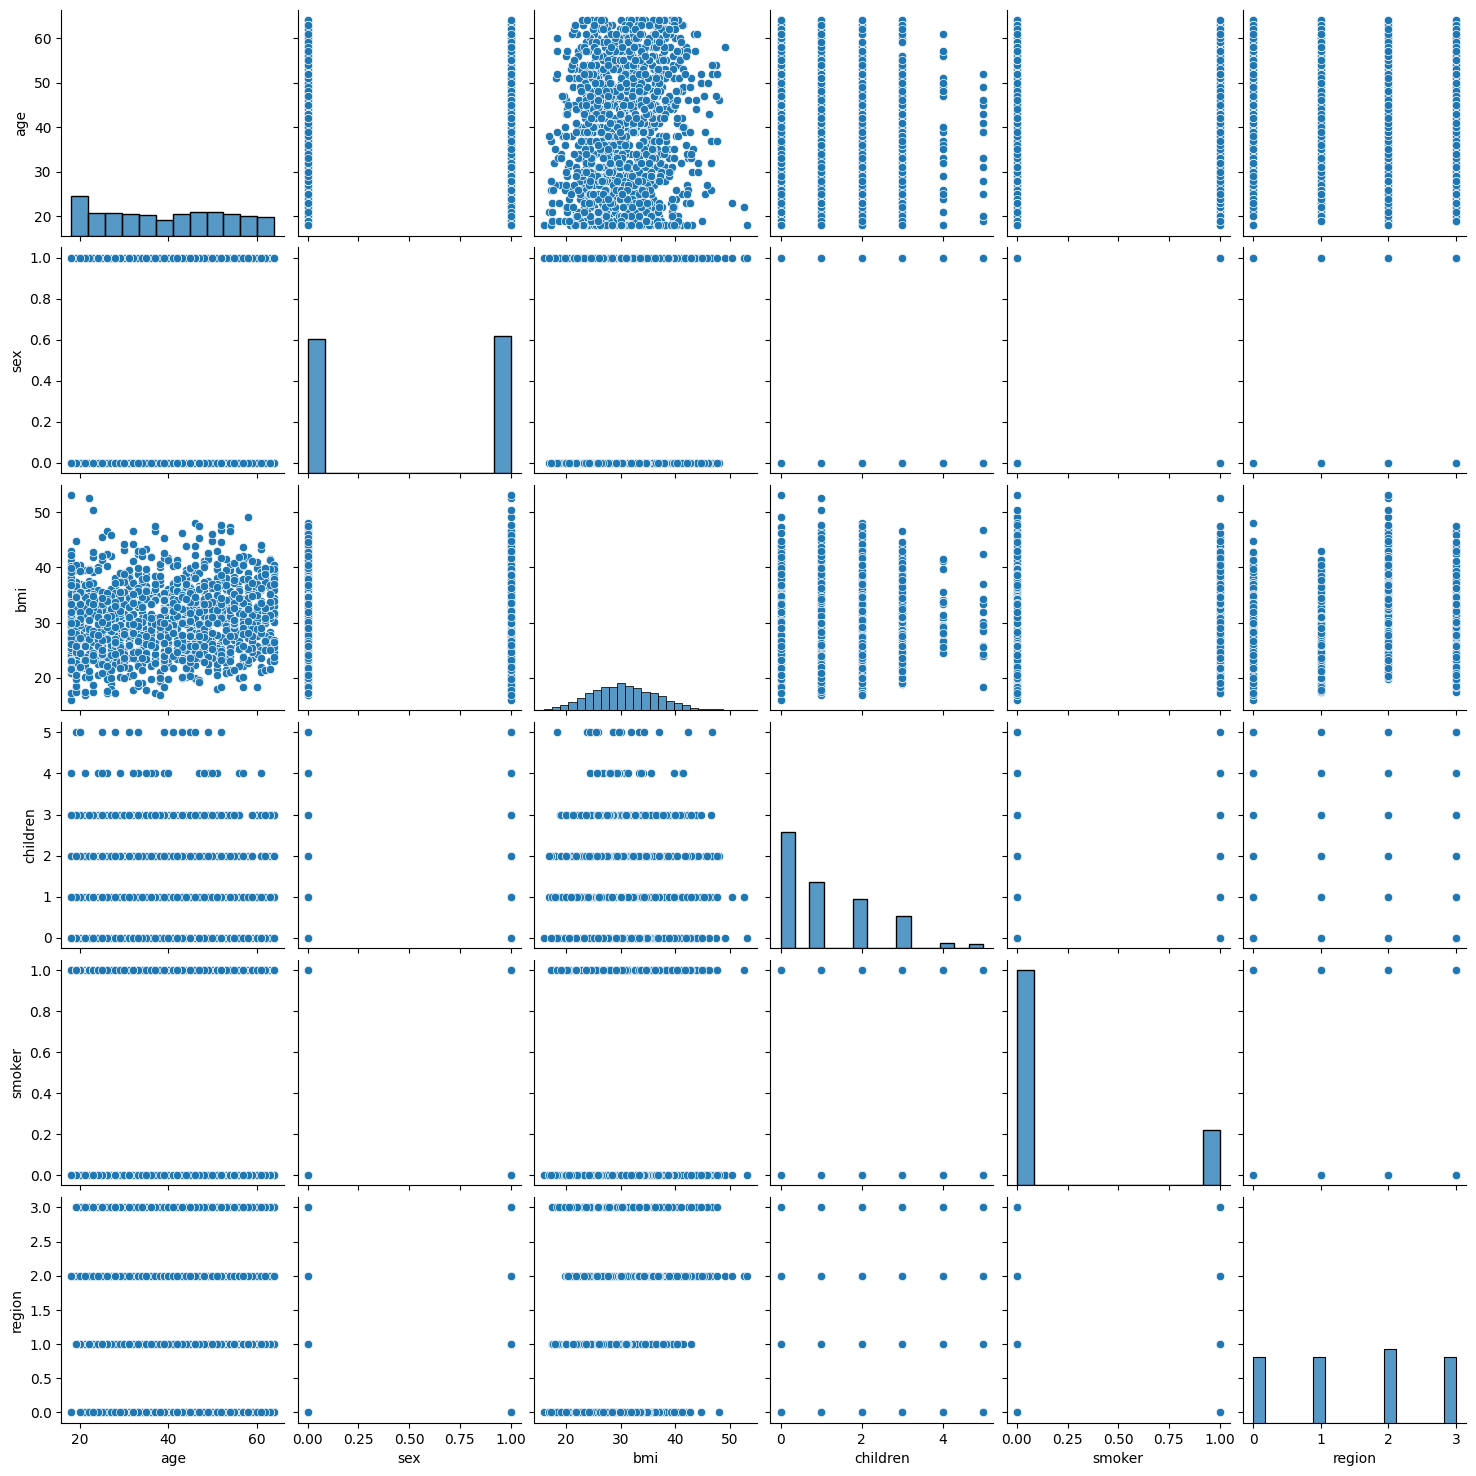

In [ ]:
sns.pairplot(x)

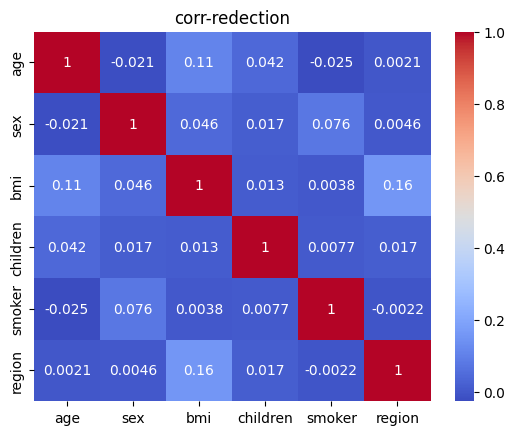

In [ ]:
head_map = x.corr()
sns.heatmap(head_map,annot=True,cmap='coolwarm')
mlt.title('corr-redection')
mlt.show()

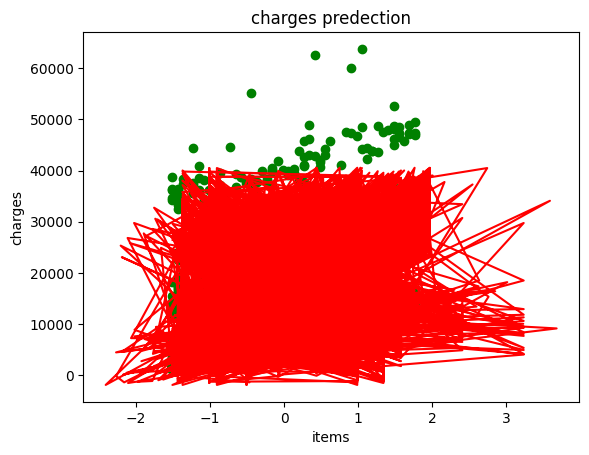

In [ ]:
mlt.scatter(x_train[:,[0]],y_train,color = "green")
mlt.plot(x_train,model_x.predict(x_train),color = "red")
mlt.title("charges predection")
mlt.xlabel("items")
mlt.ylabel("charges")
mlt.show()

In [ ]:
from sklearn.metrics import r2_score
r2_score(predict_mx,y_test)

0.6950981668735874

In [ ]:
"result ::;machilearned succesfully 69.50% machine passed"

